In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
cd gdrive/MyDrive/UNCC/Fall23/TA:\ ML/Hws/HW3

/content/gdrive/MyDrive/UNCC/Fall23/TA: ML/Hws/HW3


In [3]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn import metrics
from sklearn.linear_model import LogisticRegressionCV

In [60]:
def model_training(X_train, y_train, X_test, y_test, cv=None, penalty='none', c=0.1, solver='lbfgs'):
    classifier = LogisticRegression(penalty=penalty, C=c, solver=solver, random_state=0)
    classifier.fit(X_train, y_train)
    Y_pred = classifier.predict(X_test)
    cnf_matrix = confusion_matrix(y_test, Y_pred)
    return cnf_matrix, Y_pred

def get_confusion_matrix(cnf_matrix):
    class_names=[0,1] # name  of classes
    fig, ax = plt.subplots()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names)
    plt.yticks(tick_marks, class_names)
    # create heatmap
    sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
    ax.xaxis.set_label_position("top")
    plt.tight_layout()
    plt.title('Confusion matrix', y=1.1)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')

def get_results(y_test, Y_pred):
    acc = metrics.accuracy_score(y_test, Y_pred)
    print("Accuracy:",metrics.accuracy_score(y_test, Y_pred))
    print("Precision:",metrics.precision_score(y_test, Y_pred))
    print("Recall:",metrics.recall_score(y_test, Y_pred))
    print("F1-Score:",metrics.f1_score(y_test, Y_pred))
    return acc*100.0

# Diabetes dataset read

In [61]:
df = pd.read_csv("diabetes.csv")
print("CSV File Shape")
print(df.shape)
df.head()

CSV File Shape
(768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [62]:
X = df.iloc[:, :8].values
Y = df.iloc[:, 8].values

sc_X = StandardScaler()
X_scaled = sc_X.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=42)
# sc_X = StandardScaler()
# X_train = sc_X.fit_transform(X_train)
# X_test = sc_X.transform(X_test)

# Problem-1

In [63]:
cnf_matrix, Y_pred = model_training(X_train, y_train, X_test, y_test)

In [64]:
acc_1 = get_results(y_test, Y_pred)

Accuracy: 0.7727272727272727
Precision: 0.6851851851851852
Recall: 0.6727272727272727
F1-Score: 0.6788990825688074


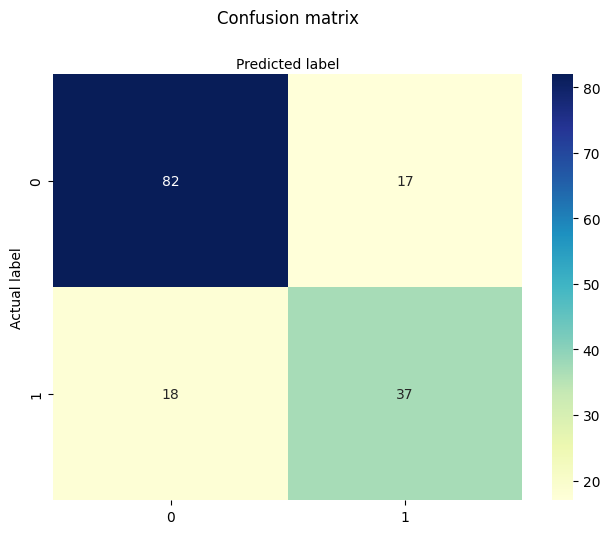

In [65]:
get_confusion_matrix(cnf_matrix)

# Breast Cancer dataset read

In [66]:
from sklearn.datasets import load_breast_cancer
breast = load_breast_cancer()
X = breast.data
print(X.shape)
Y = breast.target

breast_input = pd.DataFrame(X)
breast_input.head()

(569, 30)


,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=42)
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

# Problem-2(a)

In [68]:
cnf_matrix_2_a, Y_pred_2_a = model_training(X_train, y_train, X_test, y_test)

In [69]:
acc_2_a = get_results(y_test, Y_pred_2_a)

Accuracy: 0.9385964912280702
Precision: 0.9848484848484849
Recall: 0.9154929577464789
F1-Score: 0.948905109489051


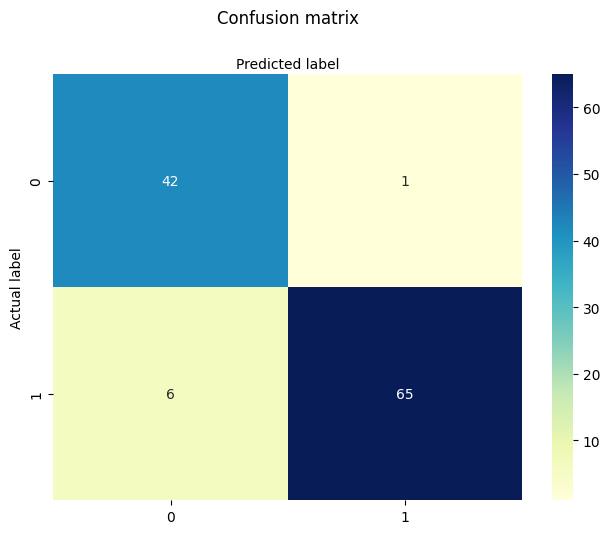

In [70]:
get_confusion_matrix(cnf_matrix_2_a)

# Problem-2(b)

In [16]:
cnf_matrix_2_b, Y_pred_2_b = model_training(X_train, y_train, X_test, y_test, penalty='l2', c=10, solver='lbfgs')
acc_2_b = get_results(y_test, Y_pred_2_b)

Accuracy: 0.9736842105263158
Precision: 0.9857142857142858
Recall: 0.971830985915493
F1-Score: 0.9787234042553192


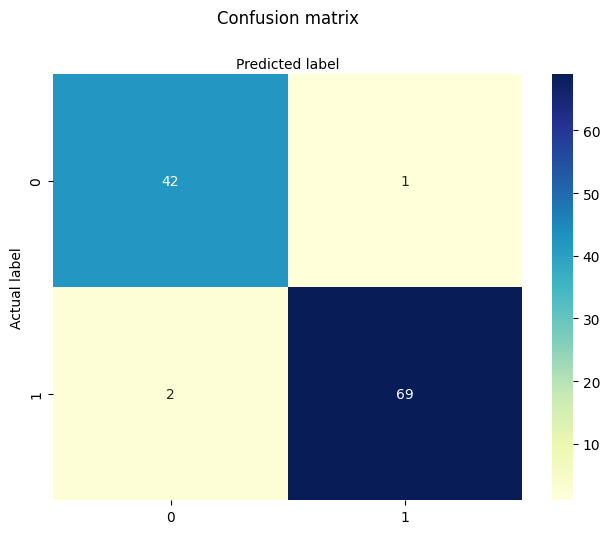

In [17]:
get_confusion_matrix(cnf_matrix_2_b)

# Problem-3

In [18]:
from sklearn.naive_bayes import GaussianNB

In [40]:
def model_training_NB(X_train, y_train, X_test, y_test):
    classifier = GaussianNB()
    y_pred = classifier.fit(X_train, y_train).predict(X_test)
    cnf_matrix = confusion_matrix(y_test, y_pred)
    return cnf_matrix, y_pred


In [41]:
cnf_matrix_3, Y_pred_3 = model_training_NB(X_train, y_train, X_test, y_test)
acc_3 = get_results(y_test, Y_pred_3)

Accuracy: 0.9649122807017544
Precision: 0.958904109589041
Recall: 0.9859154929577465
F1-Score: 0.9722222222222222


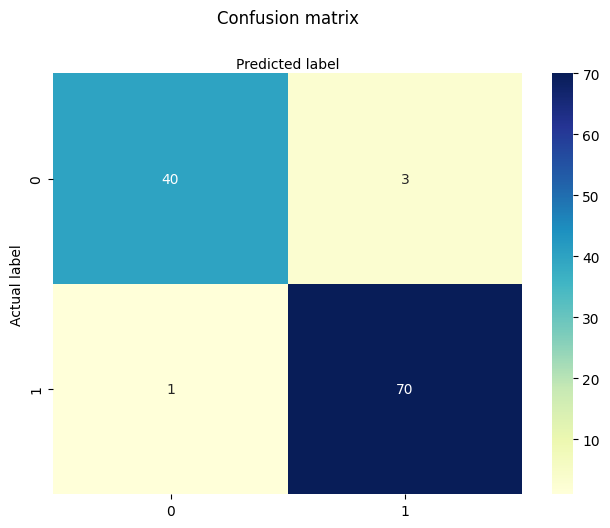

In [42]:
get_confusion_matrix(cnf_matrix_3)

# Problem-4&5

In [44]:
from sklearn.decomposition import PCA

In [55]:
def get_results(y_test, Y_pred):
    acc = metrics.accuracy_score(y_test, Y_pred)
    pre = metrics.precision_score(y_test, Y_pred)
    rec = metrics.recall_score(y_test, Y_pred)
    fscore = metrics.f1_score(y_test, Y_pred)
    print("Accuracy:",metrics.accuracy_score(y_test, Y_pred))
    print("Precision:",metrics.precision_score(y_test, Y_pred))
    print("Recall:",metrics.recall_score(y_test, Y_pred))
    print("F1-Score:",metrics.f1_score(y_test, Y_pred))
    return [acc*100.0, pre*100.0, rec*100.0, fscore*100.0]


def logist_model_training_pca(X, Y):
    n=X.shape[1]
    acc_list=[]
    recall_list=[]
    precision_list=[]
    f1score_list = []
    k_list=[]
    for i in range(n):
        print("K = "+ str(i+1))
        pca = PCA(n_components=i+1)
        principalComponents = pca.fit_transform(X)
        X_train, X_test, y_train, y_test = train_test_split(principalComponents, Y, test_size=0.20, random_state=9999)
        #classifier = LogisticRegression(penalty='l2', C=1, solver = 'lbfgs')
        classifier = LogisticRegression(random_state=9)
        classifier.fit(X_train, y_train)
        Y_pred = classifier.predict(X_test)
        re = get_results(y_test, Y_pred)
        acc_list.append(re[0])
        precision_list.append(re[1])
        recall_list.append(re[2])
        f1score_list.append(re[3])
        k_list.append(i+1)
    high_acc = max(acc_list)
    high_acc_k=acc_list.index(max(acc_list))+1
    print("----------------")
    print("Highest Classification Accuracy Achieved: "+ str(high_acc)+" for K number = "+str(high_acc_k))
    return k_list, acc_list, precision_list, recall_list, f1score_list


def GaussianNB_model_training_pca(X, Y):
    n=X.shape[1]
    acc_list=[]
    recall_list=[]
    precision_list=[]
    f1score_list=[]
    k_list=[]
    for i in range(n):
        print("K = "+ str(i+1))
        pca = PCA(n_components=i+1)
        principalComponents = pca.fit_transform(X)
        X_train, X_test, y_train, y_test = train_test_split(principalComponents, Y, test_size=0.20, random_state=9999)
        classifier = GaussianNB()
        classifier.fit(X_train, y_train)
        Y_pred = classifier.predict(X_test)
        re = get_results(y_test, Y_pred)
        acc_list.append(re[0])
        precision_list.append(re[1])
        recall_list.append(re[2])
        f1score_list.append(re[3])
        k_list.append(i+1)
    high_acc = max(acc_list)
    high_acc_k=acc_list.index(max(acc_list))+1
    print("----------------")
    print("Highest Classification Accuracy Achieved: "+ str(high_acc)+" for K number = "+str(high_acc_k))
    return k_list, acc_list, precision_list, recall_list, f1score_list

def plot_result_with_k(k_list, acc_list, precision_list, recall_list, f1score_list):
    plt.plot(k_list, acc_list, label = "Accuracy")
    plt.plot(k_list, precision_list, label = "Precision")
    plt.plot(k_list, recall_list, label = "Recall")
    plt.plot(k_list, f1score_list, label = "F1-Score")
    plt.legend()
    plt.title('Plotting classification accuracy, precision, recall and F1-score over a different number of Ks')
    plt.ylabel('Value')
    plt.xlabel('K')
    plt.show()

In [48]:
from sklearn.datasets import load_breast_cancer
breast = load_breast_cancer()
X = breast.data
print(X.shape)
Y = breast.target
breast_input = pd.DataFrame(X)

sc_X = StandardScaler()
X = sc_X.fit_transform(breast_input)

(569, 30)


Problem-4

In [58]:
k_list, acc_list, precision_list, recall_list, f1score_list  = logist_model_training_pca(X,Y)

K = 1
Accuracy: 0.9298245614035088
Precision: 0.9487179487179487
Recall: 0.9487179487179487
F1-Score: 0.9487179487179487
K = 2
Accuracy: 0.9385964912280702
Precision: 0.9382716049382716
Recall: 0.9743589743589743
F1-Score: 0.9559748427672956
K = 3
Accuracy: 0.9649122807017544
Precision: 0.9743589743589743
Recall: 0.9743589743589743
F1-Score: 0.9743589743589743
K = 4
Accuracy: 0.9912280701754386
Precision: 0.9873417721518988
Recall: 1.0
F1-Score: 0.9936305732484078
K = 5
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-Score: 1.0
K = 6
Accuracy: 0.9912280701754386
Precision: 1.0
Recall: 0.9871794871794872
F1-Score: 0.9935483870967742
K = 7
Accuracy: 0.9912280701754386
Precision: 1.0
Recall: 0.9871794871794872
F1-Score: 0.9935483870967742
K = 8
Accuracy: 0.9824561403508771
Precision: 0.9871794871794872
Recall: 0.9871794871794872
F1-Score: 0.9871794871794872
K = 9
Accuracy: 0.9912280701754386
Precision: 1.0
Recall: 0.9871794871794872
F1-Score: 0.9935483870967742
K = 10
Accuracy: 0.982456140350

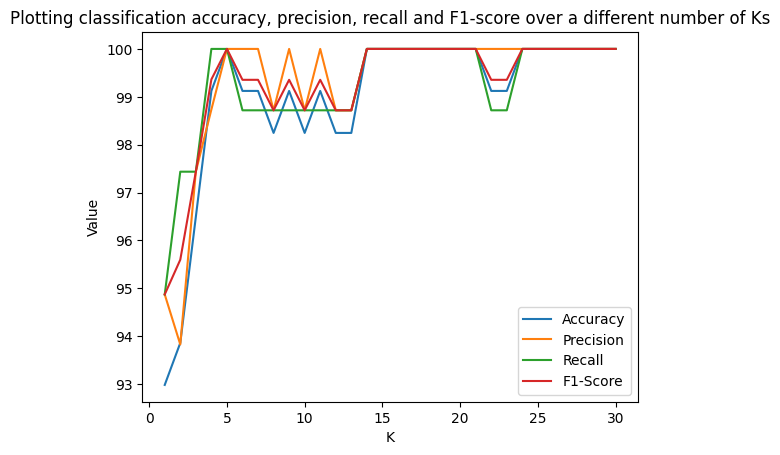

In [59]:
plot_result_with_k(k_list, acc_list, precision_list, recall_list, f1score_list)

Problem-5

In [56]:
k_list, acc_list, precision_list, recall_list, f1score_list  =  GaussianNB_model_training_pca(X, Y)

K = 1
Accuracy: 0.9385964912280702
Precision: 0.9493670886075949
Recall: 0.9615384615384616
F1-Score: 0.9554140127388535
K = 2
Accuracy: 0.9385964912280702
Precision: 0.9493670886075949
Recall: 0.9615384615384616
F1-Score: 0.9554140127388535
K = 3
Accuracy: 0.9385964912280702
Precision: 0.961038961038961
Recall: 0.9487179487179487
F1-Score: 0.9548387096774195
K = 4
Accuracy: 0.9473684210526315
Precision: 0.9615384615384616
Recall: 0.9615384615384616
F1-Score: 0.9615384615384616
K = 5
Accuracy: 0.9473684210526315
Precision: 0.9615384615384616
Recall: 0.9615384615384616
F1-Score: 0.9615384615384616
K = 6
Accuracy: 0.9385964912280702
Precision: 0.961038961038961
Recall: 0.9487179487179487
F1-Score: 0.9548387096774195
K = 7
Accuracy: 0.9385964912280702
Precision: 0.961038961038961
Recall: 0.9487179487179487
F1-Score: 0.9548387096774195
K = 8
Accuracy: 0.9122807017543859
Precision: 0.9358974358974359
Recall: 0.9358974358974359
F1-Score: 0.9358974358974359
K = 9
Accuracy: 0.9122807017543859


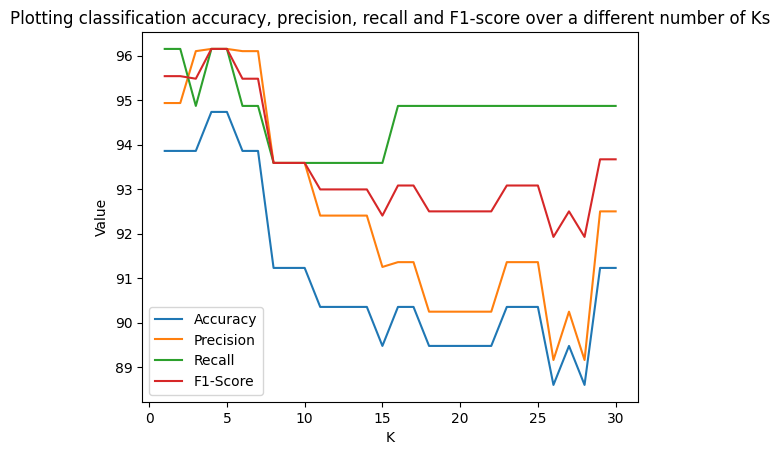

In [57]:
plot_result_with_k(k_list, acc_list, precision_list, recall_list, f1score_list)